# Kazakh-Russian Code-Switching: dataset samples
* For the term project, I explored two dataset samples to analyze how these resources would help to address the research question related to code-switching.
* The preliminary EDA of two samples are given below. 

In [309]:
# Import libs
import numpy as np
import pandas as pd
import nltk
import glob
import seaborn as sns
import re
from nltk.corpus import PlaintextCorpusReader 

## Exploring dataset No.1: Kazakh Speech Corpus
* Source: https://issai.nu.edu.kz/kz-speech-corpus/?version=1.1
* Topics: Parliament and Podcasts

#### Overview of code snippets:
- Read .txt files from the KSC (Parliament and Podcasts folders) using nltk's PlaintextCorpusReader
- Build dataframe from those files and add Source column
- Merge dataframes
- Simple stats: token counts, value counts by Source 

In [310]:
# Read all available .txt files with different topics and build a dataframe.
# Files from Parliament - US Congress

corpus_root = "/Users/aidyn/Downloads/ISSAI_KSC2/Test/parliament"
ksc_mp = PlaintextCorpusReader(corpus_root, '.*txt')


In [311]:
print('# of files:', len(ksc_mp.fileids()))
print('# of words:',len(ksc_mp.words()))

# of files: 773
# of words: 9980


In [312]:
ksc_list = []
for f in ksc_mp.fileids():
    Filename = f
    Text = ksc_mp.raw(f)
    ksc_list.append((Filename, Text))
# ets_list
mp_df = pd.DataFrame(ksc_list)
mp_df.rename(columns={0: "Filename", 1: "Text"}, inplace = True)
mp_df['Source'] = 'Parliament'
mp_df.head()

,Filename,Text,Source
0,mazhilis_01_000.txt,қайырлы күн құрметті әріптестер құрметті депут...,Parliament
1,mazhilis_01_001.txt,баршаңызды тіркеуден өтулеріңізді сұраймын,Parliament
2,mazhilis_01_002.txt,тіркеу режимі қосылсын,Parliament
3,mazhilis_01_003.txt,жұмысымызды бастау үшін қажетті кворум бар,Parliament
4,mazhilis_01_004.txt,мәжілістің жалпы отырысын ашық деп жариялаймын,Parliament


In [313]:
# Add additional columns
Tokens = mp_df.Text.map(nltk.word_tokenize)
# tokenized essays
mp_df['Tokens'] = Tokens
# length of essays
mp_df['Token_count'] = mp_df.Tokens.map(len)
mp_df.head()

,Filename,Text,Source,Tokens,Token_count
0,mazhilis_01_000.txt,қайырлы күн құрметті әріптестер құрметті депут...,Parliament,"[қайырлы, күн, құрметті, әріптестер, құрметті,...",6
1,mazhilis_01_001.txt,баршаңызды тіркеуден өтулеріңізді сұраймын,Parliament,"[баршаңызды, тіркеуден, өтулеріңізді, сұраймын]",4
2,mazhilis_01_002.txt,тіркеу режимі қосылсын,Parliament,"[тіркеу, режимі, қосылсын]",3
3,mazhilis_01_003.txt,жұмысымызды бастау үшін қажетті кворум бар,Parliament,"[жұмысымызды, бастау, үшін, қажетті, кворум, бар]",6
4,mazhilis_01_004.txt,мәжілістің жалпы отырысын ашық деп жариялаймын,Parliament,"[мәжілістің, жалпы, отырысын, ашық, деп, жария...",6


In [314]:
mp_df.tail()

,Filename,Text,Source,Tokens,Token_count
768,senate_01_397.txt,иностранной валюты,Parliament,"[иностранной, валюты]",2
769,senate_01_398.txt,депутат перепечина,Parliament,"[депутат, перепечина]",2
770,senate_01_399.txt,спасибо құрметті әріптестер басқа сауалдар жоқ,Parliament,"[спасибо, құрметті, әріптестер, басқа, сауалда...",6
771,senate_01_400.txt,біз бүгін еліміздің қоғамдық саяси өмірін және...,Parliament,"[біз, бүгін, еліміздің, қоғамдық, саяси, өмірі...",15
772,senate_01_401.txt,осымен сенаттың отырысын жабық деп жариялаймын...,Parliament,"[осымен, сенаттың, отырысын, жабық, деп, жария...",8


In [315]:
mp_df.Token_count.mean()

12.910737386804657

In [316]:
corpus_root = "/Users/aidyn/Downloads/ISSAI_KSC2/Test/podcasts"
ksc_pc = PlaintextCorpusReader(corpus_root, '.*txt')

In [317]:
print('# of files:',len(ksc_pc.fileids()))
print('# of words:',len(ksc_pc.words()))

# of files: 1547
# of words: 21870


In [318]:
pc_list = []
for f in ksc_pc.fileids():
    Filename = f
    Text = ksc_pc.raw(f)
    pc_list.append((Filename, Text))
# ets_list
pc_df = pd.DataFrame(pc_list)
pc_df.rename(columns={0: "Filename", 1: "Text"}, inplace = True)
pc_df['Source'] = 'Podcast'

# Add additional columns
Tokens = pc_df.Text.map(nltk.word_tokenize)
# tokenized essays
pc_df['Tokens'] = Tokens
# length of essays
pc_df['Token_count'] = pc_df.Tokens.map(len)
pc_df.head()


,Filename,Text,Source,Tokens,Token_count
0,09_00_000.txt,қайырлы күн құрметті не әңгіме подкастын тыңда...,Podcast,"[қайырлы, күн, құрметті, не, әңгіме, подкастын...",7
1,09_00_001.txt,бүгін сіздермен тағы да қауышқалы отырмыз,Podcast,"[бүгін, сіздермен, тағы, да, қауышқалы, отырмыз]",6
2,09_00_002.txt,ыыы не әңгіме подкастының бүгінгі қонағы ммм н...,Podcast,"[ыыы, не, әңгіме, подкастының, бүгінгі, қонағы...",23
3,09_00_003.txt,жәке қош келдіңіз,Podcast,"[жәке, қош, келдіңіз]",3
4,09_00_005.txt,бүгін ыыы біз сізбен ммм еліміздегі ііі дін мә...,Podcast,"[бүгін, ыыы, біз, сізбен, ммм, еліміздегі, ііі...",20


In [319]:
pc_df.Token_count.mean()

14.137039431157078

### Merging dataframes

In [320]:
frames = [mp_df, pc_df]
ksc_1 = pd.concat(frames)
len(ksc_1)

2320

In [321]:
ksc_1.groupby("Source")["Token_count"].sum()

Source
Parliament     9980
Podcast       21870
Name: Token_count, dtype: int64

In [322]:
ksc_1.Source.value_counts()

Podcast       1547
Parliament     773
Name: Source, dtype: int64

In [323]:
ksc_1.groupby("Source")["Token_count"].describe()

,count,mean,std,min,25%,50%,75%,max
Source,,,,,,,,
Parliament,773.0,12.910737,7.436157,2.0,6.0,12.0,18.0,35.0
Podcast,1547.0,14.137039,6.642164,2.0,9.0,13.0,19.0,34.0


In [324]:
ksc_1.Tokens

0       [қайырлы, күн, құрметті, әріптестер, құрметті,...
1         [баршаңызды, тіркеуден, өтулеріңізді, сұраймын]
2                              [тіркеу, режимі, қосылсын]
3       [жұмысымызды, бастау, үшін, қажетті, кворум, бар]
4       [мәжілістің, жалпы, отырысын, ашық, деп, жария...
                              ...                        
1542       [бәрекелді, олай, болса, келгеніңізге, рахмет]
1543                  [ы, пікір, білдіргеніңізге, рахмет]
1544    [ы, қазақ, айтады, адасқанның, айыбы, жоқ, қай...
1545    [сондықтан, адасқан, бауырымыз, бауырларымыз, ...
1546    [жаңағы, келгендеріне, қуанып, жатыр, сол, қуа...
Name: Tokens, Length: 2320, dtype: object

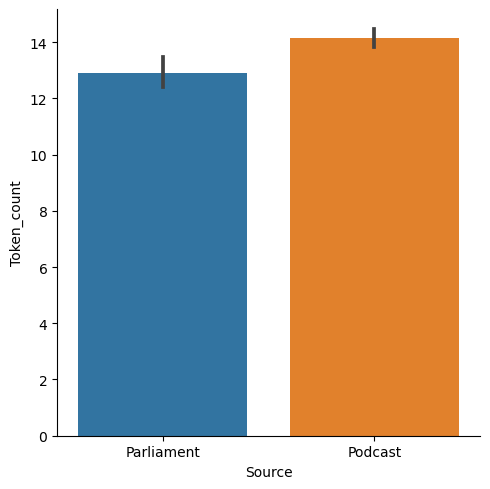

In [325]:
sns.catplot(data = ksc_1, x = 'Source', y = 'Token_count', kind='bar')

## Summary of KSC dataset

- **Advantages**: 
    - Publicly available for research and can be redistributed under *Creative Commons Attribution 4.0 International License*. 
    - Utterances related to multiple topics such as Government, Podcast, Talkshow, Radio, TV_news;
    - Relatively easy to compile all .txt files into the dataframe;

- **Disadvantages**:
    - Utterances are too short and not connected to each other even though it is spoken data;
    - Samples were manually selected by the researchers from books, news outlets, etc. to ensure the high quality of utterances. For more details: https://doi.org/10.48550/arXiv.2009.10334
    - Authors cleaned out the Russian sentences or purely Russian words for the target Kazakh ASR purposes;
    - The downloaded file lacks metadata: age, sex, region, SES of speakers. The dataset description says  it has that data but I was able to download the dataset only partially (10 GB out of 75 GB).
    - After manually screening two folders with .txt files, I found only 26 utterances with Russian borrowings or morphologically adapted words;
    - So, there is no clear evidence for Kazakh-Russian code-switching within the conversation or sentence. Just having Russian borrowings in Kazakh sentences might be hard to count as pure code-switching.


******

## Exploring dataset No.2: IARPA Babel Kazakh Language Pack
- Source: https://catalog.ldc.upenn.edu/LDC2018S13
- Brief description: It contains approximately 203 hours of Kazakh conversational and scripted telephone speech collected in 2013 and 2014 along with corresponding transcripts.

#### Overview of code snippets:
- Read dev and sub-train folders with demographics
- Read .txt files (conversation transcriptions) from the same folders 
- Reorganize filenames to merge metadata and txt files
- Merge metadata and txt files
- Clean Speech_raw column since it contains timestamps, remarks in English and other unnecessary tokens
- Add Sents and Tokens columns
- The inal dataframe contains 400 conversations with metadata

In [326]:
# Read tsv file
metadata1 = pd.read_table("/Users/aidyn/Downloads/IARPA_BABEL_OP2_302/conversational/reference_materials/demographics.tsv")
metadata1.head()

,outputFn,sessID,date,time,spkrCode,lineType,dialect,gen,envType,age,network,phoneModel,sampleCount,sampleRate
0,BABEL_OP2_302_10002_20140316_215637_outLine.sph,10002,20140316,215637,10002,outLine,SOUTHERN,M,HOME_OFFICE_MOBILE,42,ACTIVE_KCELL,NOKIA,4823040,8000
1,BABEL_OP2_302_10002_20140316_215637_inLine.sph,10002,20140316,215637,10002,inLine,SOUTHERN,M,PUBLIC_PLACE,36,ACTIVE_KCELL,NOKIA,4800960,8000
2,BABEL_OP2_302_10188_20131030_194100_outLine.sph,10188,20131030,194100,10188,outLine,SOUTHERN,F,VEHICLE,17,TELE2,SAMSUNG,4801600,8000
3,BABEL_OP2_302_10188_20131030_194100_inLine.wav,10188,20131030,194100,10188,inLine,SOUTHERN,F,MICROPHONE,18,TELE2,SAMSUNG,30855552,48000
4,BABEL_OP2_302_11673_20131104_223908_inLine.sph,11673,20131104,223908,11673,inLine,SOUTHERN,M,HOME_OFFICE_MOBILE,19,TELE2,NOKIA,4800320,8000


In [327]:
metadata1.shape

(668, 14)

In [328]:
metadata1.describe()

,sessID,date,time,spkrCode,age,sampleCount,sampleRate
count,668.000000,6.680000e+02,668.000000,668.000000,668.000000,6.680000e+02,668.000000
mean,49998.931138,2.013500e+07,170583.000000,49998.931138,33.005988,7.217622e+06,12431.137725
std,27708.568322,4.470589e+03,67210.898592,27708.568322,13.760098,8.163342e+06,12563.710642
min,10002.000000,2.013103e+07,22.000000,10002.000000,16.000000,6.036800e+05,8000.000000
25%,24241.000000,2.013112e+07,164054.000000,24241.000000,20.000000,4.800160e+06,8000.000000
50%,45706.000000,2.013122e+07,192920.500000,45706.000000,30.000000,4.800800e+06,8000.000000
75%,77033.000000,2.014013e+07,212825.000000,77033.000000,46.000000,4.822240e+06,8000.000000
max,99887.000000,2.014033e+07,235807.000000,99887.000000,64.000000,3.234547e+07,48000.000000


In [329]:
metadata2 = pd.read_table("/Users/aidyn/Downloads/IARPA_BABEL_OP2_302/conversational/reference_materials/demographics.sub-train.tsv")
metadata2.shape

(130, 14)

In [330]:
metadata = pd.concat([metadata1, metadata2])
metadata.rename(columns={'outputFn': 'fileName'}, inplace=True)
# metadata.info()
# metadata.head()
metadata.shape

(798, 14)

In [331]:
metadata['fileName'] = metadata['fileName'].astype(str).str.replace('BABEL', '')
metadata['fileName'] = metadata['fileName'].astype(str).str.replace('sph', 'txt')
metadata['fileName'] = metadata['fileName'].astype(str).str.replace('wav', 'txt')
metadata.head()

,fileName,sessID,date,time,spkrCode,lineType,dialect,gen,envType,age,network,phoneModel,sampleCount,sampleRate
0,_OP2_302_10002_20140316_215637_outLine.txt,10002,20140316,215637,10002,outLine,SOUTHERN,M,HOME_OFFICE_MOBILE,42,ACTIVE_KCELL,NOKIA,4823040,8000
1,_OP2_302_10002_20140316_215637_inLine.txt,10002,20140316,215637,10002,inLine,SOUTHERN,M,PUBLIC_PLACE,36,ACTIVE_KCELL,NOKIA,4800960,8000
2,_OP2_302_10188_20131030_194100_outLine.txt,10188,20131030,194100,10188,outLine,SOUTHERN,F,VEHICLE,17,TELE2,SAMSUNG,4801600,8000
3,_OP2_302_10188_20131030_194100_inLine.txt,10188,20131030,194100,10188,inLine,SOUTHERN,F,MICROPHONE,18,TELE2,SAMSUNG,30855552,48000
4,_OP2_302_11673_20131104_223908_inLine.txt,11673,20131104,223908,11673,inLine,SOUTHERN,M,HOME_OFFICE_MOBILE,19,TELE2,NOKIA,4800320,8000


In [332]:
# txt files 
corpus_dir = "/Users/aidyn/Downloads/IARPA_BABEL_OP2_302/conversational"

speech_data1 = glob.glob(corpus_dir + '/dev/transcription/*.txt')
speech_data1[0]

'/Users/aidyn/Downloads/IARPA_BABEL_OP2_302/conversational/dev/transcription/BABEL_OP2_302_85322_20131108_161437_outLine.txt'

In [333]:
len(speech_data1)

140

In [334]:
pathlen = len(corpus_dir + '/dev/transcription/*.txt')

In [335]:
speech_dict1 = {}

for fname in speech_data1:
    fname_short = fname[pathlen:] # Using Option 2
    # print(fname_short)      # print short name for checking
    txt = open(fname).read()  # open file and read text content! 
    speech_dict1[fname_short] = txt

In [336]:
print(speech_dict1['_OP2_302_85322_20131108_161437_outLine.txt'][:100])

[0.000]
<no-speech>
[0.095]
<no-speech>
[3.005]
<no-speech>
[5.675]
алло иә иә
[6.675]
<no-speech>
[


In [337]:
speech_df = pd.DataFrame({'fileName':speech_dict1.keys(), 'Speech_raw':speech_dict1.values()})
speech_df.head()

,fileName,Speech_raw
0,_OP2_302_85322_20131108_161437_outLine.txt,[0.000]\n<no-speech>\n[0.095]\n<no-speech>\n[3...
1,_OP2_302_44868_20131217_205716_inLine.txt,[0.000]\n<no-speech>\n[8.375]\nалло\n[8.905]\n...
2,_OP2_302_19703_20131202_234704_outLine.txt,[0.000]\n<no-speech>\n[2.375]\n<no-speech>\n[2...
3,_OP2_302_60830_20131205_225122_outLine.txt,[0.000]\n<no-speech>\n[6.645]\nалло\n[7.335]\n...
4,_OP2_302_47156_20140313_011009_outLine.txt,[0.000]\n<no-speech>\n[0.505]\n<no-speech>\n[4...


In [338]:
speech_data2 = glob.glob(corpus_dir + '/sub-train/transcription/*.txt')
speech_data2[0]

'/Users/aidyn/Downloads/IARPA_BABEL_OP2_302/conversational/sub-train/transcription/BABEL_OP2_302_85010_20140316_222754_outLine.txt'

In [339]:
len(speech_data2)

130

In [340]:
pathlen = len(corpus_dir + '/sub-train/transcription/*.txt')
speech_dict2 = {}

for fname in speech_data2:
    fname_short = fname[pathlen:] # Using Option 2
    # print(fname_short)      # print short name for checking
    txt = open(fname).read()  # open file and read text content! 
    speech_dict2[fname_short] = txt

In [341]:
speech_df2 = pd.DataFrame({'fileName':speech_dict2.keys(), 'Speech_raw':speech_dict2.values()})
# speech_df2.head()

In [342]:
speech_data = pd.concat([speech_df, speech_df2])
speech_data.head()

,fileName,Speech_raw
0,_OP2_302_85322_20131108_161437_outLine.txt,[0.000]\n<no-speech>\n[0.095]\n<no-speech>\n[3...
1,_OP2_302_44868_20131217_205716_inLine.txt,[0.000]\n<no-speech>\n[8.375]\nалло\n[8.905]\n...
2,_OP2_302_19703_20131202_234704_outLine.txt,[0.000]\n<no-speech>\n[2.375]\n<no-speech>\n[2...
3,_OP2_302_60830_20131205_225122_outLine.txt,[0.000]\n<no-speech>\n[6.645]\nалло\n[7.335]\n...
4,_OP2_302_47156_20140313_011009_outLine.txt,[0.000]\n<no-speech>\n[0.505]\n<no-speech>\n[4...


In [343]:
speech_data.shape

(270, 2)

In [344]:
# merge two df on fileName
data_kaz = pd.merge(metadata, speech_data)
data_kaz.sample(3)

,fileName,sessID,date,time,spkrCode,lineType,dialect,gen,envType,age,network,phoneModel,sampleCount,sampleRate,Speech_raw
356,_OP2_302_84408_20131207_204020_inLine.txt,84408,20131207,204020,84408,inLine,SOUTHERN,F,HOME_OFFICE_MOBILE,42,ACTIVE_KCELL,NOKIA,4800320,8000,[0.000]\n<no-speech>\n[0.965]\n<no-speech>\n[3...
65,_OP2_302_44868_20131217_205108_inLine.txt,44868,20131217,205108,44868,inLine,SOUTHERN,F,CAR_KIT,21,ACTIVE_KCELL,NOKIA,693280,8000,[0.000]\n<no-speech>\n[5.815]\nалло\n[6.685]\n...
230,_OP2_302_34477_20131205_030548_outLine.txt,34477,20131205,30548,34477,outLine,SOUTHERN,F,HOME_OFFICE_LANDLINE,49,KAZAKHTELECOM,PANASONIC,2513760,8000,[0.000]\n<no-speech>\n[9.615]\nиә иә иә тыңдап...


In [345]:
data_kaz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fileName     400 non-null    object
 1   sessID       400 non-null    int64 
 2   date         400 non-null    int64 
 3   time         400 non-null    int64 
 4   spkrCode     400 non-null    int64 
 5   lineType     400 non-null    object
 6   dialect      400 non-null    object
 7   gen          400 non-null    object
 8   envType      400 non-null    object
 9   age          400 non-null    int64 
 10  network      400 non-null    object
 11  phoneModel   400 non-null    object
 12  sampleCount  400 non-null    int64 
 13  sampleRate   400 non-null    int64 
 14  Speech_raw   400 non-null    object
dtypes: int64(7), object(8)
memory usage: 50.0+ KB


In [346]:
data_kaz['Speech_clean'] = data_kaz.Speech_raw.str.replace(r'[^\w\s]+', '', regex=True)
data_kaz['Speech_clean'] = data_kaz.Speech_clean.str.replace(r'\d+', '', regex=True)
data_kaz['Speech_clean'] = data_kaz.Speech_clean.str.replace(r'[a-z]+', '', regex=True)
data_kaz['Speech_clean'] = data_kaz.Speech_clean.str.replace(r'\n+', '.', regex=True)

In [347]:
data_kaz.Speech_clean[:10]

0    .неғыл дейсіз.алло.алло. алейкум ассалаум.алло...
1    .ассалаумалейкум ассалаумалейкум  алло.ааа Сәк...
2    .нет . да.алло.иә иә.привет жақсы өзің.алло.жа...
3    .алло.Айдана  алло Айдана привет ой қалайсың. ...
4    .алло. алло.алло ассалаумалейкум .қалай жағдай...
5    . алло .алло .қазір . алейкум ассалаум қалай ж...
6    . ойбай  ау.алло.ааа привет.аманесен жақсы өзі...
7    .алло.алло алло Жұлдыз алло Жұлдыз қалай жағда...
8    .жоқ сөйле.жоқ сөйлесе беріңіз менімен бірге  ...
9    .мен ке келістім келістім келіспедім деген жау...
Name: Speech_clean, dtype: object

In [348]:
data_kaz['Sents'] = data_kaz.Speech_clean.str.split('.')
data_kaz.Sents[1][:5]
# data_kaz['Sents']  = data_kaz.Sents.dropna(how='all')

# data_kaz['Sents'] = data_kaz.Speech_clean.map(nltk.sent_tokenize)
# len(data_kaz.Sents[1])
# data_kaz.Sents[1]

['',
 'ассалаумалейкум ассалаумалейкум  алло',
 'ааа Сәкен аға қалайсыз деймін  ей мен ғой мен Жарқынбай',
 'алло алло алло',
 'жақсы жақсы қалай өзіңіз иә аман аман қалай  ааа сол бір хабарласайын дедім сөйлесіп  ааа']

In [349]:
data_kaz['Tokens'] = data_kaz.Speech_clean.map(nltk.word_tokenize)
data_kaz.sample(3)

,fileName,sessID,date,time,spkrCode,lineType,dialect,gen,envType,age,network,phoneModel,sampleCount,sampleRate,Speech_raw,Speech_clean,Sents,Tokens
245,_OP2_302_41233_20140111_195838_outLine.txt,41233,20140111,195838,41233,outLine,SOUTHERN,M,STREET,16,BEELINE,NOKIA,4822400,8000,[0.000]\n<no-speech>\n[3.065]\n<no-speech>\n[3...,.саламатсыз ба.саламатсыз ба.қалыңыз қалай.көш...,"[, саламатсыз ба, саламатсыз ба, қалыңыз қалай...","[.саламатсыз, ба.саламатсыз, ба.қалыңыз, қалай..."
53,_OP2_302_36669_20131206_164229_inLine.txt,36669,20131206,164229,36669,inLine,SOUTHERN,M,HOME_OFFICE_MOBILE,18,ACTIVE_KCELL,NOKIA,4800160,8000,[0.000]\n<no-speech>\n[5.535]\nалло\n[6.185]\n...,.алло.алло қалайсың.алло.қалайсың .алло.алло ...,"[, алло, алло қалайсың, алло, қалайсың , алло...","[.алло.алло, қалайсың.алло.қалайсың, .алло.алл..."
104,_OP2_302_77730_20131114_223327_outLine.txt,77730,20131114,223327,77730,outLine,SOUTHERN,F,HOME_OFFICE_MOBILE,16,ACTIVE_KCELL,SAMSUNG,1229120,8000,[0.000]\n<no-speech>\n[4.595]\n<no-speech>\n[5...,. алло.алло.кім бұл.ау.ей чего там не ол не но...,"[, алло, алло, кім бұл, ау, ей чего там не ол...","[., алло.алло.кім, бұл.ау.ей, чего, там, не, о..."


In [350]:
data_kaz.shape

(400, 18)

### Summary

- **Advantages**:
    - Metadata: age, gender, 'dialect', environment type, etc.
    - Each .txt file is a telephone conversation and therefore contains great examples of Kazak-Russian code-switching (phrase level code-switching so far has been observed) as well as adapted Russian words within Kazakh utterance.
    - Connected speech;

- **Disadvantages**:
    - The dataset cannot be fully shared/redistributed;
    - I can use this dataset as a Pitt student only for the university related projects/coursework;
    
    



    


### **Future Work**

Summing up, the dataset No.2: IARPA Babel Kazakh Language Pack contains more relevant data points to explore Kazakh-Russian code-switching and make reasonable inferences regarding linguistic characteristics of the phenomenon. Therefore, after careful consideration, I will further use this dataset as a main source of my term project. After manually screening the txt files (integrated into Speech_raw column), I have encountered multiple examples of intra-sentential and intra-word code switching instances. My goals are the following:

- clean the Speech column to get rid off unnecessary tokens like extra punctuation marks(.,);
- EDA analysis of the dataset overall;
- annotate instances of code-switching using the annoation scheme;
- closely examine Russian code-switching instances:
    - what type of code-switching is more prevalent: intra-sentential or intra-word;
- one strategy to recognize Russian words within Kazakh utterances is look for specific letters that do not occur in original Kazakh words, such as sequences of consonants at the beginning of the word, consonant clusters typical for Russian, and so on. For more details: https://link.springer.com/chapter/10.1007/978-3-319-23132-7_3 

### References

Khassanov, Y., Mussakhojayeva, S., Mirzakhmetov, A., Adiyev, A., Nurpeiissov, M., & Varol, H. A. (2020). A crowdsourced open-source Kazakh speech corpus and initial speech recognition baseline. arXiv preprint arXiv:2009.10334.

Khomitsevich, O., Mendelev, V., Tomashenko, N., Rybin, S., Medennikov, I., Kudubayeva, S. (2015). A Bilingual Kazakh-Russian System for Automatic Speech Recognition and Synthesis. In: Ronzhin, A., Potapova, R., Fakotakis, N. (eds) Speech and Computer. SPECOM 2015. Lecture Notes in Computer Science(), vol 9319. Springer, Cham.

